<center><font color="Black" size="6"><b>Artificial Intelligence and Machine learning</b></font></center>

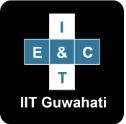

<center><font color="brown" size="5"><b>Week 19: Graded Mini Project</b></font></center>

**Project title**: Sentiment Analysis on Twitter Data Using RNN

**Objective**: Classify tweets as positive, negative, or neutral by building a deep learning model with an RNN architecture. This project simulates a full NLP pipeline—from data cleaning to model optimization—as typically seen in industries like social media analytics, customer service, and marketing tech.

## <font color="brown">Task 1: Data Cleaning and Preprocessing</font>

### <font color="orange">A. Load the Dataset</font>

In [62]:
import pandas as pd

df = pd.read_csv('/content/Week 19 - Graded Mini Project - Dataset - Twitter-training.csv', header=None)

# Preview
print("Preview:")
display(df.head())

# Dataset info
print("\nDataset Info:")
print(df.info())

# summary
print("\nSummary:")
display(df.describe())



Preview:


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Summary:


,0
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [2]:
df.columns = ["id", "topic", "sentiment", "tweet"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,id,topic,sentiment,tweet
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,Microsoft,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


### <font color="orange">B. Data Cleaning</font>

#### 1. Handle any missing or duplicate entries.

In [3]:
df = df.drop_duplicates().reset_index(drop=True)
df = df.dropna(subset=["tweet"]).reset_index(drop=True)

print("Shape after cleaning:", df.shape)

Shape after cleaning: (71656, 4)


#### 2. Clean Tweet Text: Remove URLs, mentions, hashtags, punctuations, and special characters.

In [4]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+","", text)
    text = re.sub(r"@\w+","", text)
    text = re.sub(r"#\w+","", text)
    text = re.sub(r"[^A-Za-z0-9 ]+"," ", text)
    text = text.lower()
    return re.sub(r"\s+"," ", text).strip()

df["clean_text"] = df["tweet"].apply(clean_text)
df.head()


,id,topic,sentiment,tweet,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


#### 3. Normalize Text: Convert to lowercase, tokenize, remove stop words. (with explanation).

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def normalize(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

df['tokens'] = df['clean_text'].apply(normalize)

#### 4. Apply Stemming or Lemmatization: Choose one technique and justify your choice.

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda t: [lemmatizer.lemmatize(w) for w in t])

df.head()

,id,topic,sentiment,tweet,clean_text,tokens,lemmas
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, borderlands, murder]","[im, getting, borderland, murder]"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[coming, borders, kill]","[coming, border, kill]"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, borderlands, kill]","[im, getting, borderland, kill]"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[im, coming, borderland, murder]"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]","[im, getting, borderland, 2, murder]"


**Why Lemmatization?**

- Produces dictionary words
- Preserves meaning
- Better for deep learning models (LSTM/GRU) because vocabulary remains meaningful
- Prevents over-fragmenting words into meaningless roots

### <font color="orange">C. Feature Engineering</font>

#### 1. Convert Text to Numerical Features: Use TF-IDF / Word2Vec / embedding layers (state your choice and why).

In [8]:
df['final_text'] = df['lemmas'].apply(lambda x: ' '.join(x))

from tensorflow.keras.preprocessing.text import Tokenizer

MAX_WORDS = 20000
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['final_text'])

word_index = tokenizer.word_index
print("Vocabulary size:", len(word_index))

sequences = tokenizer.texts_to_sequences(df['final_text'])

Vocabulary size: 27803


#### 2. Create Padded Sequences: Tokenize and pad input sequences for uniform RNN input.

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 50
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

print("Example padded sequence:\n", padded_sequences[0])

Example padded sequence:
 [ 209   97   87 1444    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df['sentiment'])

print("Label Mapping:", le.classes_)

Label Mapping: ['Irrelevant' 'Negative' 'Neutral' 'Positive']


## <font color="brown">Task 2: Exploratory Data Analysis (EDA)</font>

### <font color="orange">A. Summary Statistics: Sentiment class distribution (positive, negative, neutral)</font>

In [11]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

sentiment_percent = df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Percentage (%):\n", sentiment_percent)

Sentiment Counts:
 sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

Sentiment Percentage (%):
 sentiment
Negative      30.280786
Positive      27.510606
Neutral       24.712515
Irrelevant    17.496092
Name: proportion, dtype: float64


### <font color="orange">B. Visualizations</font>

#### 1. Bar Chart or Pie Chart: Show sentiment proportions.

/tmp/ipython-input-426013082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="viridis")


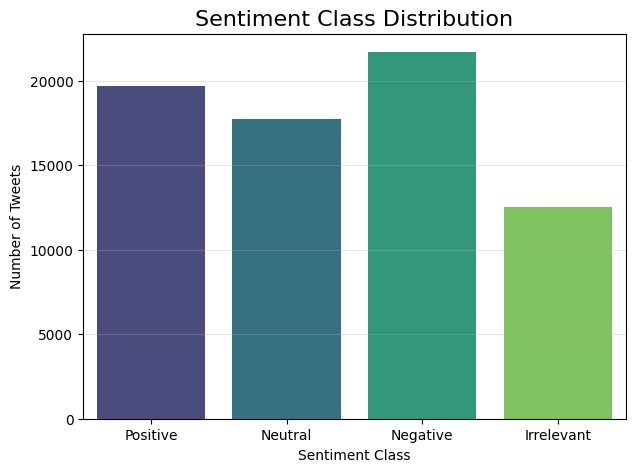

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x=df['sentiment'], palette="viridis")

plt.title("Sentiment Class Distribution", fontsize=16)
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', alpha=0.3)
plt.show()

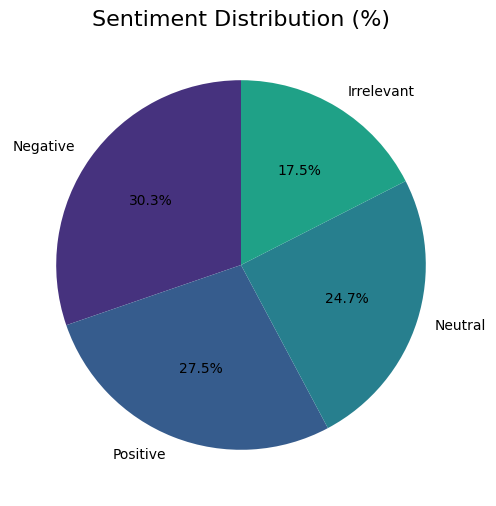

In [13]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("viridis"))

plt.title("Sentiment Distribution (%)", fontsize=16)
plt.show()

#### 2. Top Keywords by Sentiment: Use frequency plots.

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


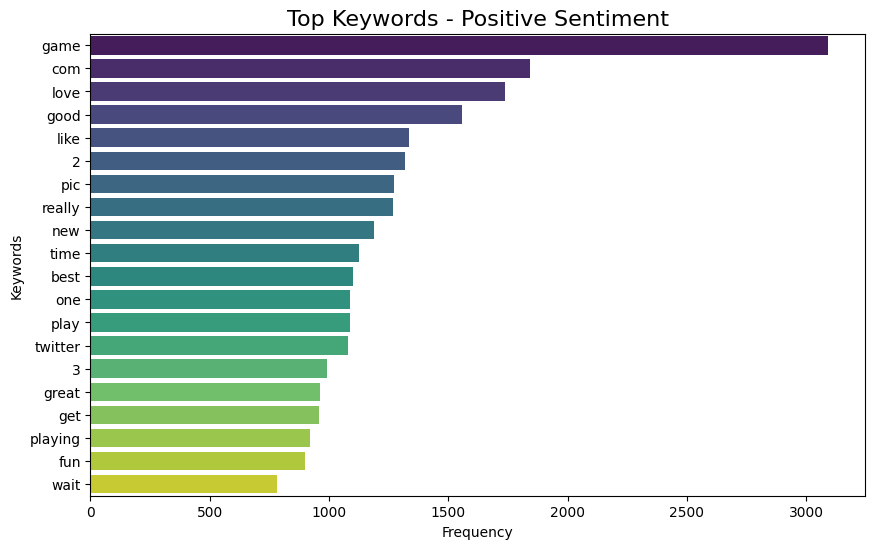

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


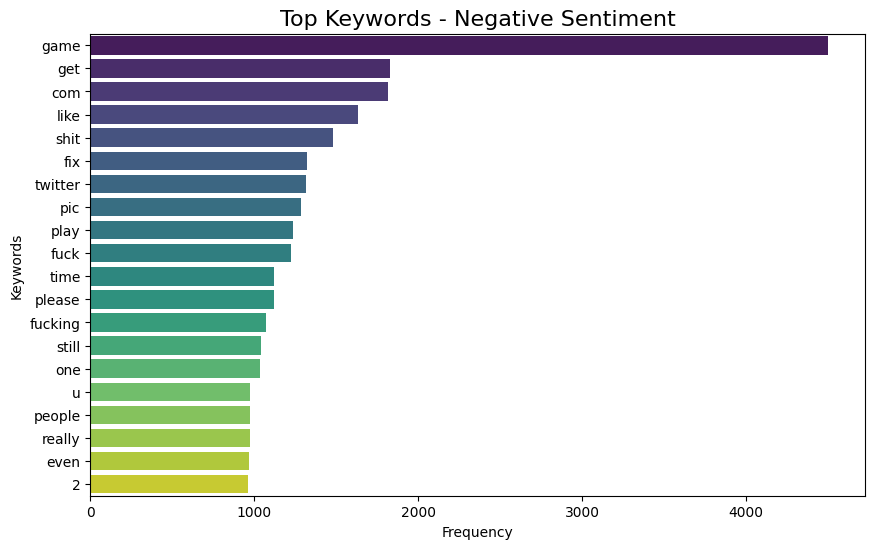

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


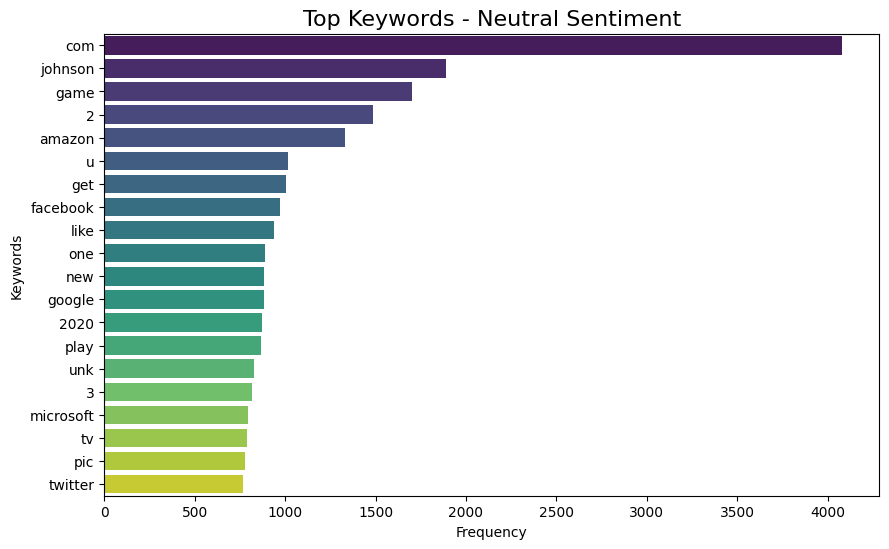

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

positive_words = df[df['sentiment'] == 'Positive']['lemmas'].sum()
negative_words = df[df['sentiment'] == 'Negative']['lemmas'].sum()
neutral_words  = df[df['sentiment'] == 'Neutral']['lemmas'].sum()

pos_freq = Counter(positive_words)
neg_freq = Counter(negative_words)
neu_freq = Counter(neutral_words)

#  Plotting function
def plot_top_words(freq_dict, title, n=20):
    top = freq_dict.most_common(n)
    words, counts = zip(*top)

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")
    plt.show()

plot_top_words(pos_freq, "Top Keywords - Positive Sentiment", n=20)
plot_top_words(neg_freq, "Top Keywords - Negative Sentiment", n=20)
plot_top_words(neu_freq, "Top Keywords - Neutral Sentiment", n=20)


#### 3. Word Clouds: For positive and negative sentiments.

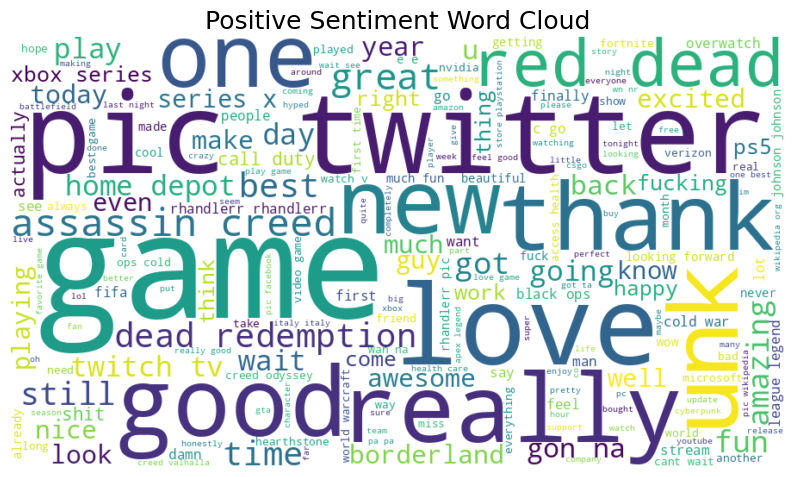

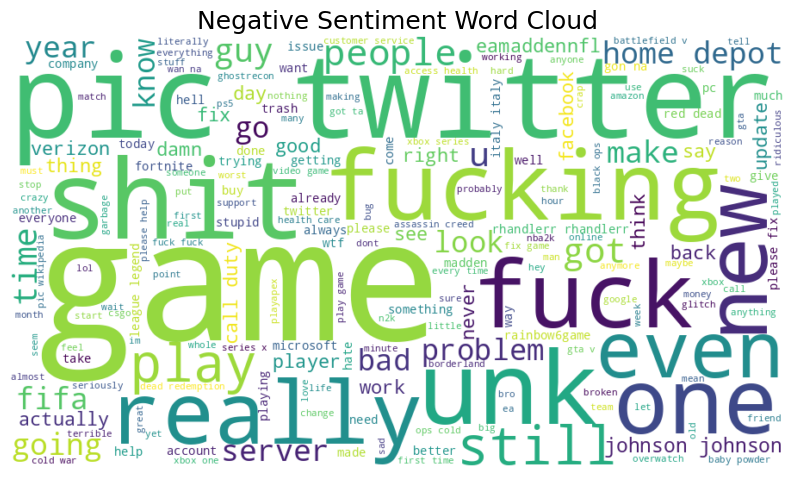

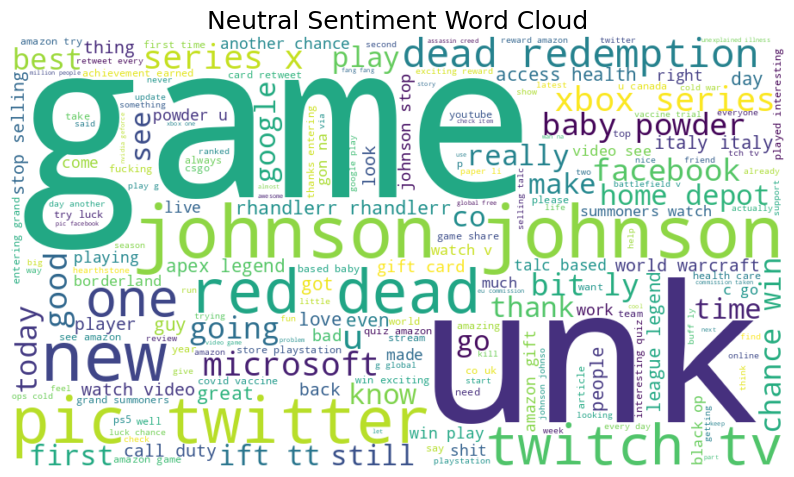

In [16]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['sentiment'] == 'Positive']['lemmas'].sum())
negative_text = " ".join(df[df['sentiment'] == 'Negative']['lemmas'].sum())
neutral_text  = " ".join(df[df['sentiment'] == 'Neutral']['lemmas'].sum())

# Word cloud function
def create_wordcloud(text, title):
    wc = WordCloud(width=900, height=500,
                   background_color='white',
                   colormap='viridis',
                   max_words=200).generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

create_wordcloud(positive_text, "Positive Sentiment Word Cloud")
create_wordcloud(negative_text, "Negative Sentiment Word Cloud")
create_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")


#### 4. Tweet Length vs Sentiment Class: Create boxplot or histogram.

In [17]:
df['tweet_length'] = df['lemmas'].apply(len)
df[['lemmas', 'tweet_length']].head()

,lemmas,tweet_length
0,"[im, getting, borderland, murder]",4
1,"[coming, border, kill]",3
2,"[im, getting, borderland, kill]",4
3,"[im, coming, borderland, murder]",4
4,"[im, getting, borderland, 2, murder]",5


/tmp/ipython-input-1008527785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment'], y=df['tweet_length'], palette="viridis")


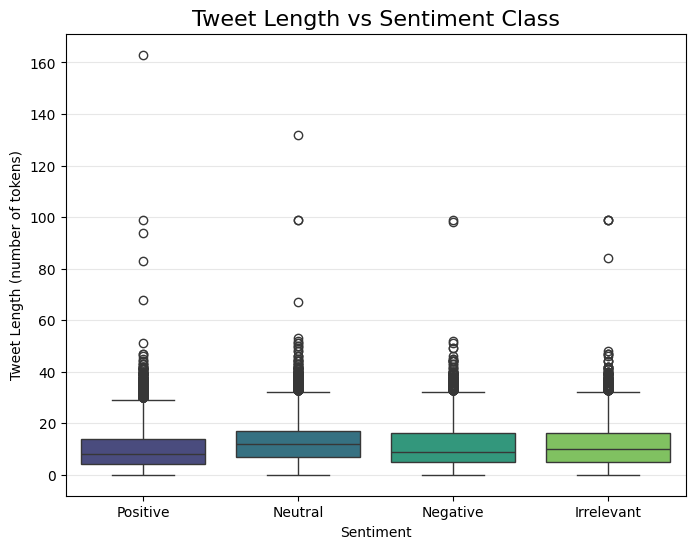

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x=df['sentiment'], y=df['tweet_length'], palette="viridis")

plt.title("Tweet Length vs Sentiment Class", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length (number of tokens)")
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipython-input-4122725352.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="tweet_length", col="sentiment",


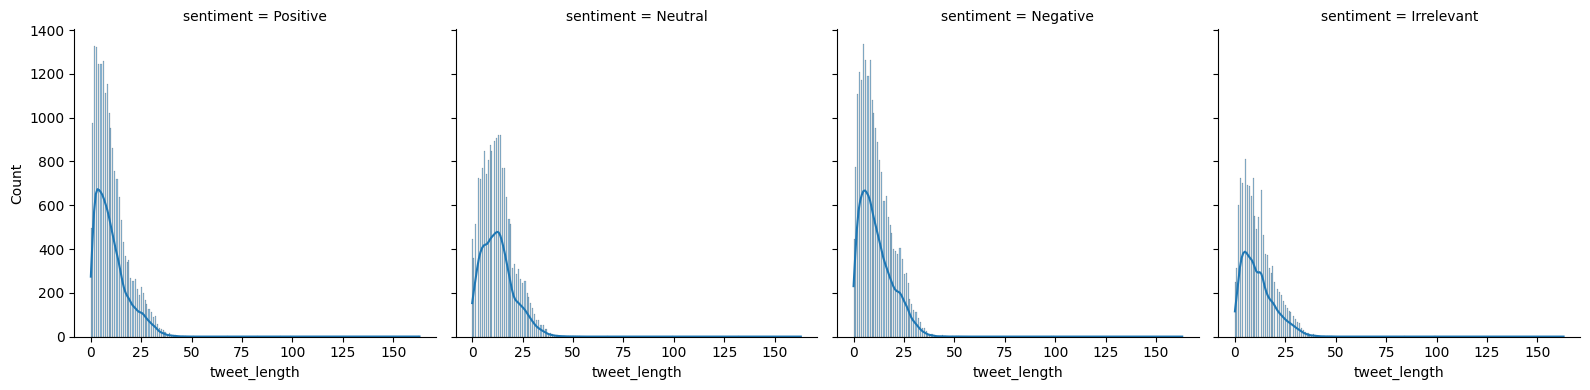

In [19]:
sns.displot(data=df, x="tweet_length", col="sentiment",
            kde=True, height=4, aspect=1, palette="viridis")

#### 5. Insights: Summarize key insights and patterns uncovered during EDA.

**Insights: Keyword Frequency by Sentiment**

- `Positive sentiment` tweets frequently contain words related to appreciation, enjoyment, enthusiasm, or support (e.g., "love", "great", "happy").
- `Negative sentiment` tweets show frequent usage of words expressing dissatisfaction, annoyance, anger, or criticism (e.g., "bad", "shit", "game", "unk").
- `Neutral sentiment` tweets mostly contain factual or descriptive terms (e.g., "com", "jsonson", "game").

**Impact:**
These patterns confirm that the dataset captures emotionally distinct linguistic signals, helping feature extraction and improving model interpretability.

**Insights: Tweet Length vs Sentiment Class**

- All sentiment classes show very short tweets (5–15 tokens) as the most common length, indicating users express emotions concisely.
- Positive tweets are the shortest and have the sharpest peak, suggesting that positive reactions are usually brief and direct.
- Negative tweets show the widest spread, with more medium-length tweets (15–25 tokens), meaning users tend to provide more detail when expressing complaints or dissatisfaction.
- Neutral and Irrelevant tweets have moderate lengths, often longer than positive tweets, as they usually convey factual, informational, or unrelated content.
- Very long tweets (>40 tokens) are rare across all classes, confirming that a padding length of 40–50 tokens is appropriate for model training.

## <font color="brown">Task 3: Model Building and Evaluation</font>

### <font color="orange">A. RNN Architecture</font>

#### 1. Model Type: LSTM / GRU (select one and justify choice).

**Chosen Model Type: LSTM (Long Short-Term Memory)**

Justification:
- LSTMs are excellent for capturing long-term dependencies in text.
- Tweets often contain sentiment-dependent context (e.g., “not good at all”), and LSTM handles such patterns well.
- LSTM performs better in most sentiment analysis problems compared to simple RNNs.
- Proven effective in many benchmark NLP datasets.

**When to prefer GRU?**
- Use GRU when the dataset is small or when you need faster training with similar accuracy.
- GRUs require fewer parameters than LSTMs.

#### 2. Layers: Include embedding, LSTM/GRU, dropout, batch normalization layers.

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

VOCAB_SIZE = 20000
EMBED_DIM = 128
MAX_LEN = 50
NUM_CLASSES = len(df['sentiment'].unique())


# Model
model = Sequential([
    Embedding(VOCAB_SIZE, EMBED_DIM, input_length=MAX_LEN),

    LSTM(128, return_sequences=False),

    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### <font color="orange">B. Training and Testing</font>

#### 1. Train/Test Split: Describe ratio, stratification if used

In [37]:
# Train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.20,
    random_state=42,
    stratify=labels
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (57324, 50)
Testing Data: (14332, 50)


#### 2. Model Training:

In [38]:
# Model Train
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.4187 - loss: 1.2569 - val_accuracy: 0.5369 - val_loss: 1.0367
Epoch 2/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7162 - loss: 0.7385 - val_accuracy: 0.3199 - val_loss: 3.1971
Epoch 3/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8241 - loss: 0.4760 - val_accuracy: 0.7235 - val_loss: 0.9206
Epoch 4/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8664 - loss: 0.3638 - val_accuracy: 0.5107 - val_loss: 1.5698
Epoch 5/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8877 - loss: 0.3050 - val_accuracy: 0.7642 - val_loss: 0.8612
Epoch 6/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9047 - loss: 0.2521 - val_accuracy: 0.8287 - val_loss: 0.6356
Epoch 7/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9186 - loss: 0.2143 - val_accuracy: 0.7480 - val_loss: 0.8510
Epoch 8/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9247 - loss: 0.1946 - val_accuracy: 0.82

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,101,326 (30.90 MB)

 Trainable params: 2,700,356 (10.30 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 5,400,714 (20.60 MB)

### <font color="orange">C. Evaluation Metrics</font>

#### 1. Accuracy, Precision, Recall, F1-score

In [40]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Accuracy: 0.8321239185040469

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.73      0.86      0.79      2507
    Negative       0.92      0.82      0.87      4340
     Neutral       0.97      0.73      0.83      3542
    Positive       0.75      0.92      0.83      3943

    accuracy                           0.83     14332
   macro avg       0.84      0.83      0.83     14332
weighted avg       0.85      0.83      0.83     14332



#### 2. Learning Curves: Plot training/validation accuracy and loss across epochs

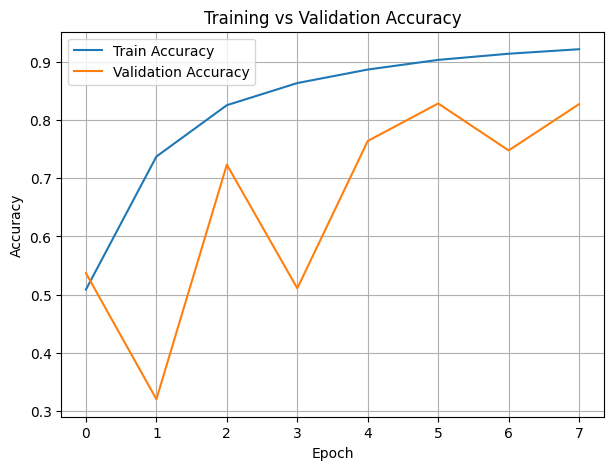

In [41]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

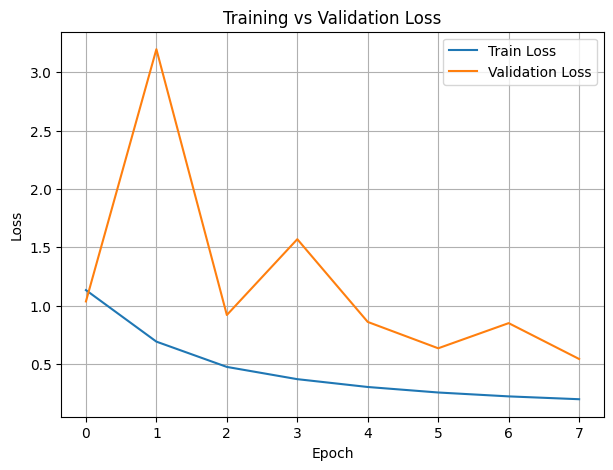

In [42]:
# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Hyperparameter Tuning: Describe experiments with layers, dropout rate, learning rate, etc.

### <font color="orange">D. Model Improvement</font>

#### 1. Use of pretrained embeddings (e.g., GloVe)

In [27]:
import numpy as np

embedding_index = {}

with open("glove.twitter.27B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print("Loaded word vectors:", len(embedding_index))

Loaded word vectors: 1193514


In [28]:
embedding_dim = 100
vocab_size = min(len(tokenizer.word_index) + 1, MAX_WORDS)

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < MAX_WORDS:
        vector = embedding_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization

model_glove = Sequential()

model_glove.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=MAX_LEN,
        trainable=False
    )
)

model_glove.add(LSTM(128, return_sequences=False))
model_glove.add(BatchNormalization())
model_glove.add(Dropout(0.4))

model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dropout(0.3))

model_glove.add(Dense(NUM_CLASSES, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [30]:
model_glove.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_glove = model_glove.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4379 - loss: 1.2716 - val_accuracy: 0.4610 - val_loss: 1.2277
Epoch 2/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5358 - loss: 1.1256 - val_accuracy: 0.3286 - val_loss: 2.1650
Epoch 3/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5775 - loss: 1.0423 - val_accuracy: 0.4915 - val_loss: 1.3638
Epoch 4/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6167 - loss: 0.9560 - val_accuracy: 0.5924 - val_loss: 1.0490
Epoch 5/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6553 - loss: 0.8708 - val_accuracy: 0.6557 - val_loss: 0.8698
Epoch 6/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6972 - loss: 0.7788 - val_accuracy: 0.6435 - val_loss: 0.8975
Epoch 7/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7419 - loss: 0.6819 - val_accuracy: 0.6309 - val_loss: 1.0110
Epoch 8/8
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7774 - loss: 0.5898 - val_accuracy: 0.71

In [43]:
loss_glove, acc_glove = model_glove.evaluate(X_test, y_test)
print("Accuracy with GloVe:", acc_glove)

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7127 - loss: 0.7866
Accuracy with GloVe: 0.7125313878059387


In [44]:
loss_base, acc_base = model.evaluate(X_test, y_test)

print("\nAccuracy without GloVe:", acc_base)
print("Accuracy with GloVe:", acc_glove)

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8284 - loss: 0.5173

Accuracy without GloVe: 0.8321239352226257
Accuracy with GloVe: 0.7125313878059387


## <font color="brown">Task 4: Presentation of Results</font>

### <font color="orange">A. Presentation Summary</font>

<center><font color="Yellow" size="6"><b>Dataset Overview</b></font></center>

In [53]:
display(df.head())

,id,topic,sentiment,tweet,clean_text,tokens,lemmas,final_text,tweet_length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,"[im, getting, borderlands, murder]","[im, getting, borderland, murder]",im getting borderland murder,4
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"[coming, borders, kill]","[coming, border, kill]",coming border kill,3
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,"[im, getting, borderlands, kill]","[im, getting, borderland, kill]",im getting borderland kill,4
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]","[im, coming, borderland, murder]",im coming borderland murder,4
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]","[im, getting, borderland, 2, murder]",im getting borderland 2 murder,5


<center><font color="Yellow" size="5"><b>Sentiment Class Distribution</b></font></center>

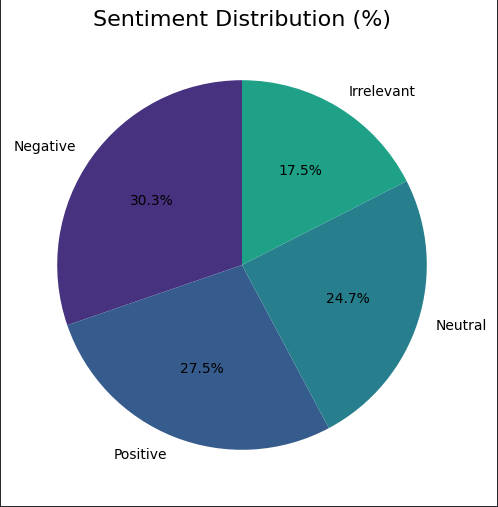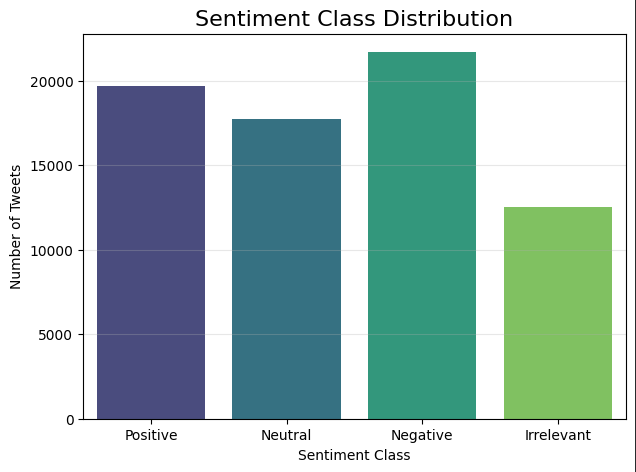

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


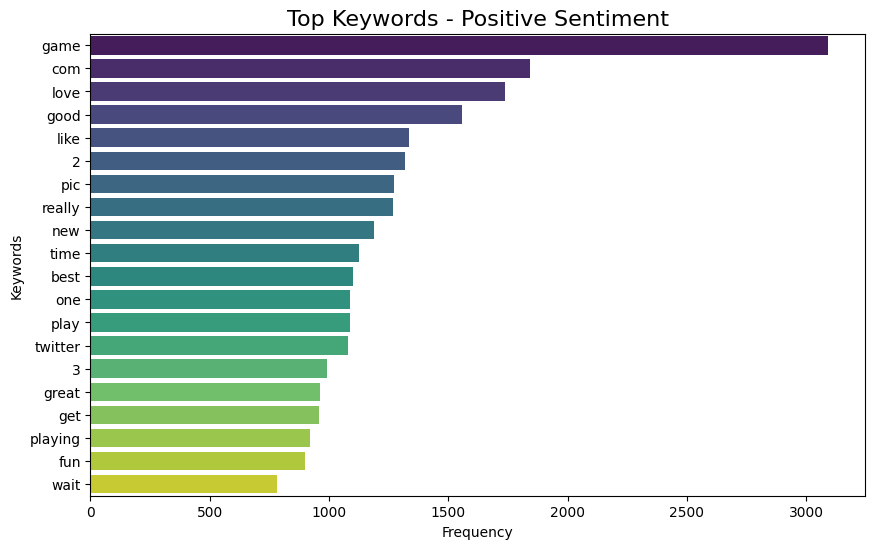

In [54]:
plot_top_words(pos_freq, "Top Keywords - Positive Sentiment", n=20)

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


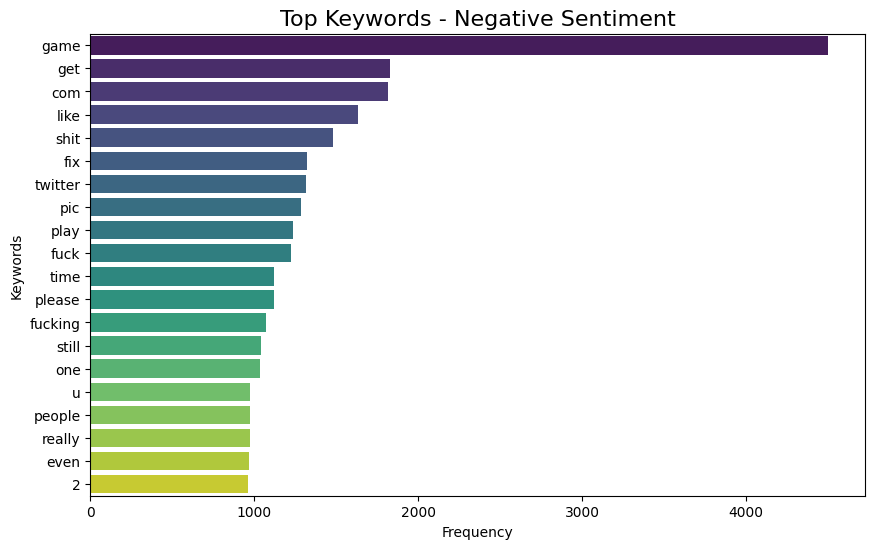

In [55]:
plot_top_words(neg_freq, "Top Keywords - Negative Sentiment", n=20)

/tmp/ipython-input-3911534159.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


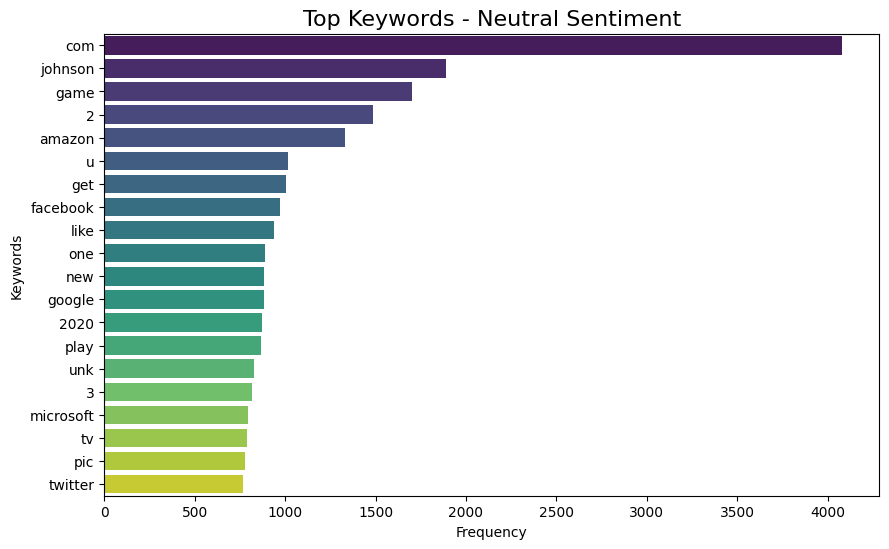

In [56]:
plot_top_words(neu_freq, "Top Keywords - Neutral Sentiment", n=20)

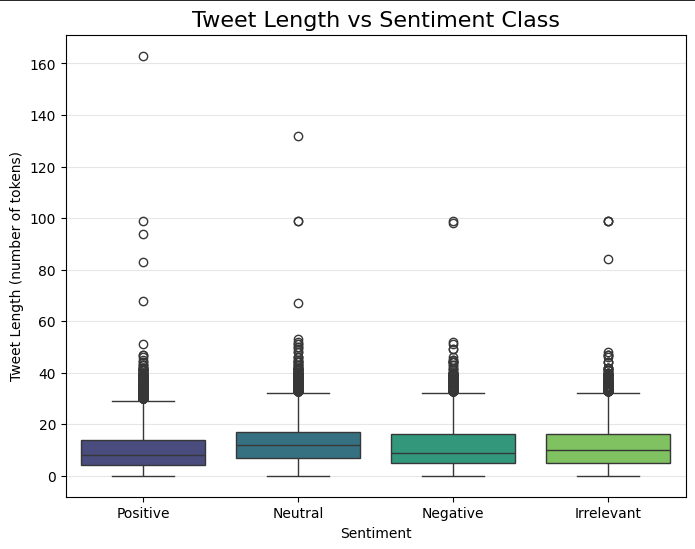

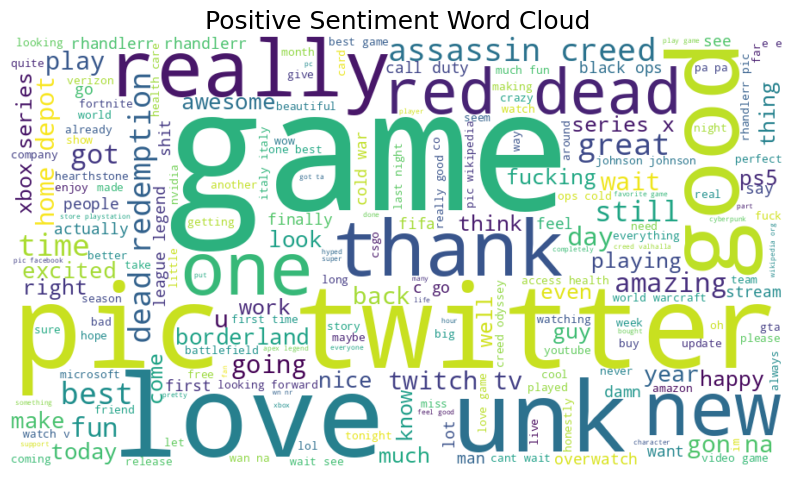

In [57]:
create_wordcloud(positive_text, "Positive Sentiment Word Cloud")

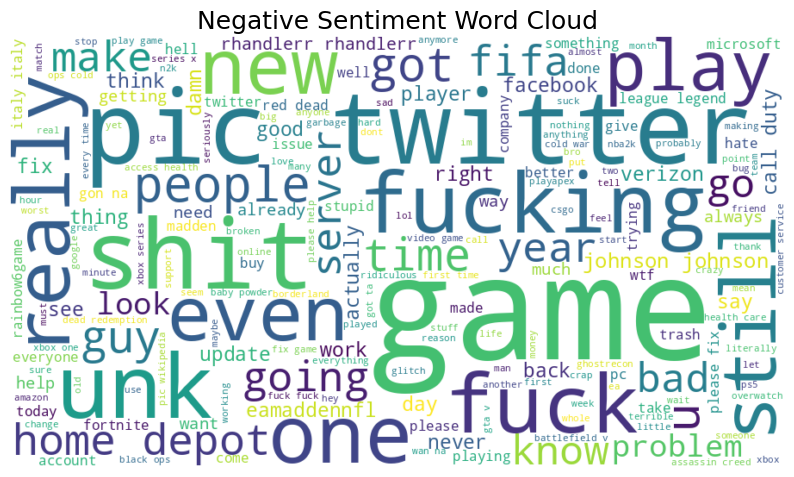

In [58]:
create_wordcloud(negative_text, "Negative Sentiment Word Cloud")

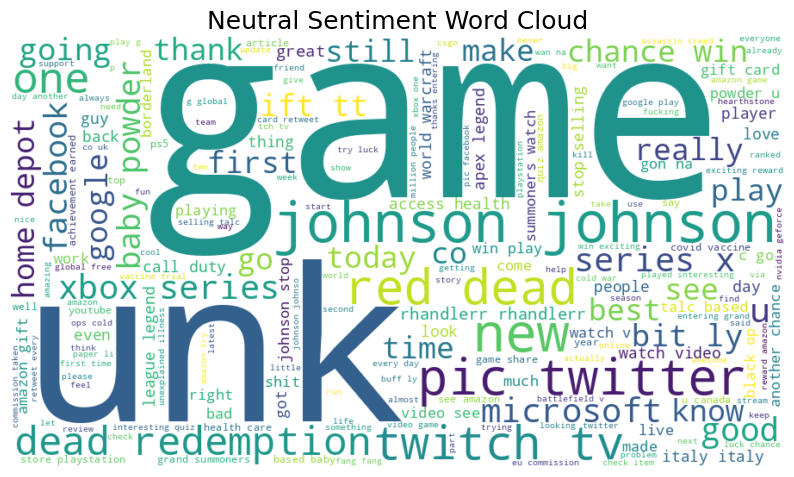

In [59]:
create_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,101,326 (30.90 MB)

 Trainable params: 2,700,356 (10.30 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 5,400,714 (20.60 MB)

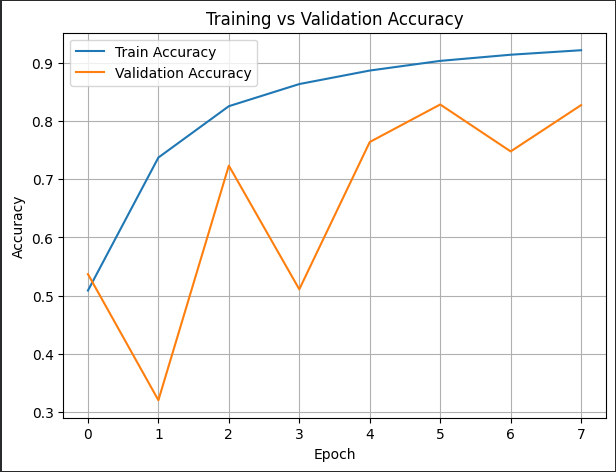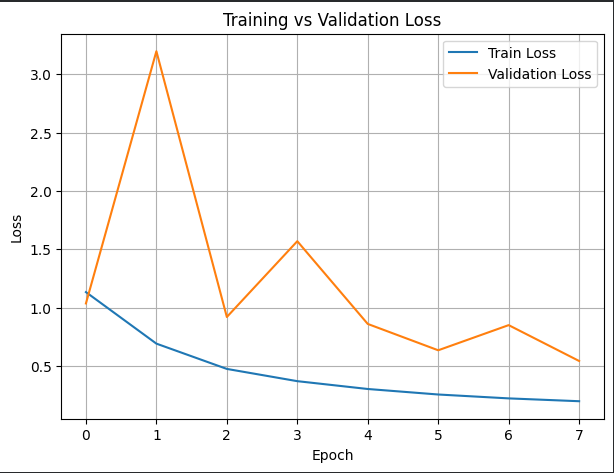

<center><font color="Yellow" size="5"><b>Evaluation</b></font></center>

In [61]:
samples = [
    "I am coming to the borders and I will kill you all,", # positive
    "Check out this epic streamer!.  ", # neutral
    "All the Borderlands are fuckin stupid", # negative
    "I love these new @ GhostLifestyle cans!! Everyone else drinks ghost?...." # irrelevant
]

seq = tokenizer.texts_to_sequences(samples)
pad = pad_sequences(seq, maxlen=MAX_LEN)
pred = model.predict(pad).argmax(axis=1)
print(le.inverse_transform(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
['Positive' 'Negative' 'Neutral' 'Positive']


<center><font color="Yellow" size="5"><b>Conclusion</b></font></center>

#### <font color="brown">**Key Learnings and Future Work**</font>

<font color="orange">**Key Learnings:**</font>
This project demonstrated the complete end-to-end NLP pipeline for sentiment analysis, highlighting the importance of thorough data cleaning, exploratory data analysis, and sequence-based modeling using LSTM. Handling noisy, real-world Twitter data is critical for building effective sentiment classifiers.

<font color="orange">**Future Work:**</font>
Future improvements include fine-tuning pretrained embeddings, experimenting more with pre-built model using transfer learning